In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Explore netcdf files used in BEST-Siberian

## A20 rivers

In [4]:
# Open dataset and print metadata summary
ncml_path = r'./A20niva_river_v6_1980.nc'
ds = xr.open_dataset(ncml_path)
ds

<xarray.Dataset>
Dimensions:          (river_time: 12, river: 609, s_rho: 40)
Coordinates:
  * river_time       (river_time) datetime64[ns] 1980-01-15 ... 1980-12-15
  * river            (river) float64 1.0 2.0 3.0 4.0 ... 606.0 607.0 608.0 609.0
Dimensions without coordinates: s_rho
Data variables: (12/40)
    river_transport  (river_time, river) float64 ...
    river_Xposition  (river) float64 ...
    river_Eposition  (river) float64 ...
    river_direction  (river) float64 ...
    river_Vshape     (s_rho, river) float64 ...
    river_salt       (river_time, s_rho, river) float64 ...
    ...               ...
    river_NR3_c      (river_time, s_rho, river) float64 ...
    river_CR1_c      (river_time, s_rho, river) float64 ...
    river_CR1_n      (river_time, s_rho, river) float64 ...
    river_CR1_p      (river_time, s_rho, river) float64 ...
    river_CR2_c      (river_time, s_rho, river) float64 ...
    river_CR3_c      (river_time, s_rho, river) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Nov 18 11:43:19 2021: cdo -selyear,1980 A20niva_river_v...
    notes:        PWA 29/04/2020: copied from A20niva_river_v5_pwa2.nc\nPWA 2...
    NCO:          4.7.2
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

## Freshwater flux to the Arctic from ice (Bamber et al. 2016)

In [2]:
# Open dataset and print metadata summary
ncml_path = f"~/shared/pan_arctic_data/freshwater_flux_from_terrestrial_ice/bamber_2016/FWF17.v3_b.nc"
ds = xr.open_dataset(ncml_path)
ds

<xarray.Dataset>
Dimensions:              (Y: 785, X: 752, TIME: 708)
Coordinates:
  * Y                    (Y) float64 -6.731e+04 -7.231e+04 ... -3.987e+06
  * X                    (X) float64 -1.778e+06 -1.773e+06 ... 1.977e+06
  * TIME                 (TIME) datetime64[ns] 1958-01-01 ... 2016-12-01
Data variables:
    runoff_tundra        (TIME, Y, X) float32 ...
    lon                  (Y, X) float64 ...
    runoff_ice           (TIME, Y, X) float32 ...
    lat                  (Y, X) float64 ...
    polar_stereographic  int8 ...
    solid_ice            (TIME, Y, X) float32 ...
    LSMGr                (Y, X) float32 ...
    ocean_basins         (Y, X) float32 ...
Attributes:
    Conventions:  CF-1.4
    institution:  University of Bristol (Andrew Tedstone)
    title:        Monthly freshwater fluxes to the ocean across the Arctic, 1...
    nx:           752.0
    ny:           785.0
    xmin:         -1777980.0
    ymax:         -67308.0
    spacing:      5000.0
    description:  This is the dataset that underlies the paper "Bamber, J., A...

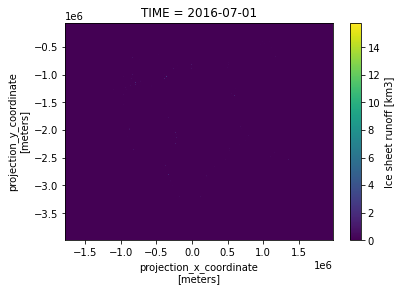

In [16]:
runoff_ice_2d = ds['runoff_ice'].isel(TIME=702)
runoff_ice_2d.plot()

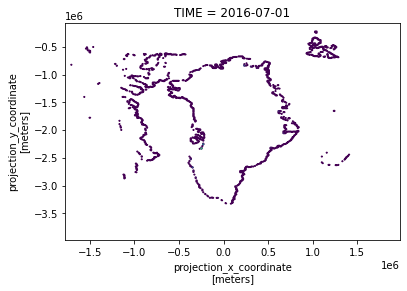

In [17]:
runoff_ice_2d.plot.contour()

In [5]:
# How to select elements from X and Y, which are projected coords in m?
runoff_ice_1d = ds['runoff_ice'].isel(lat=72, lon=-50)
runoff_ice_1d.plot()

ValueError: Dimensions {'lat', 'lon'} do not exist. Expected one or more of ('TIME', 'Y', 'X')